In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats

### Compare models with differnt learning rate and weighting parameter

In [2]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# number of models
n_models =  4
list_model = ['HierRL_twoLR_Act_Clr_model1', 'HierRL_oneLR_Act_Clr_model1', 'HierRL_dual_twoLR_Act_Clr_model1', 'HierRL_NotWeight_twoLR_Act_Clr_model1']
# declare waice variable
log_waic_models = np.zeros(n_models)
log_lppd_models = np.zeros(n_models)
# loop over list of participants
for i, model in enumerate(list_model):
    print(model)
    # main directory of saving
    mainScarch = '/mnt/scratch/projects/7TPD/amin/'
    # pickle fine in the scratch folder
    pickelDir = f'{mainScarch}/realdata/hier/{partcipant_group}/{model}.pkl'
    """Loading the pickle file of model fit from the subject directory"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit'] 
    # get the linkelihood and comarision assessment       
    log_lik = fit['log_lik']
    print(log_lik.shape)
    log_assessement = utils.waic(log_likelihood=log_lik)
    log_waic_models[i] = log_assessement['waic']
    log_lppd_models[i] = log_assessement['lppd']

HierRL_twoLR_Act_Clr_model1
(6896, 16000)
HierRL_oneLR_Act_Clr_model1
(6896, 16000)
HierRL_dual_twoLR_Act_Clr_model1
(6896, 16000)
HierRL_NotWeight_twoLR_Act_Clr_model1
(6896, 16000)


In [3]:
# waic meaure
str(np.round(log_waic_models, 1))

'[21381.  21467.5 21262.3 45185.5]'

In [4]:
# waic lppd
str(np.round(-log_lppd_models, 1))

'[ 7503.2  7596.3  7406.6 17187.6]'

In [2]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
n_models =  6
# declare waice variable
log_waic_models = np.zeros(n_models)
log_lppd_models = np.zeros(n_models)
# loop over list of participants
for m in range(n_models):
    print(m)
    # main directory of saving
    mainScarch = '/mnt/scratch/projects/7TPD/amin/'
    # pickle fine in the scratch folder
    pickelDir = f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model{m+1}.pkl'
    """Loading the pickle file of model fit from the subject directory"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit'] 
    # get the linkelihood and comarision assessment       
    log_lik = fit['log_lik']
    print(log_lik.shape)
    log_assessement = utils.waic(log_likelihood=log_lik)
    log_waic_models[m] = log_assessement['waic']
    log_lppd_models[m] = log_assessement['lppd']

0
(7519, 16000)
1
(7519, 16000)
2
(7519, 16000)
3
(7519, 16000)
4
(7519, 16000)
5
(7519, 16000)


In [3]:
# waic meaure
str(np.round(log_waic_models, 1))

'[20806.  20847.9 20909.9 20868.  20822.3 21149.5]'

In [4]:
# waic meaure
str(np.round(-log_lppd_models, 1))

'[6788.  6820.9 6838.4 6834.1 6794.1 7052.5]'

In [9]:
##Plot the model 1
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import plots


In [6]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']


In [10]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos = fit["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg = fit["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos = fit["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg = fit["transfer_hier_alphaClr_neg_mu"] 
weight = fit["transfer_hier_weight_mu"] 
beta = fit["transfer_hier_sensitivity_mu"]

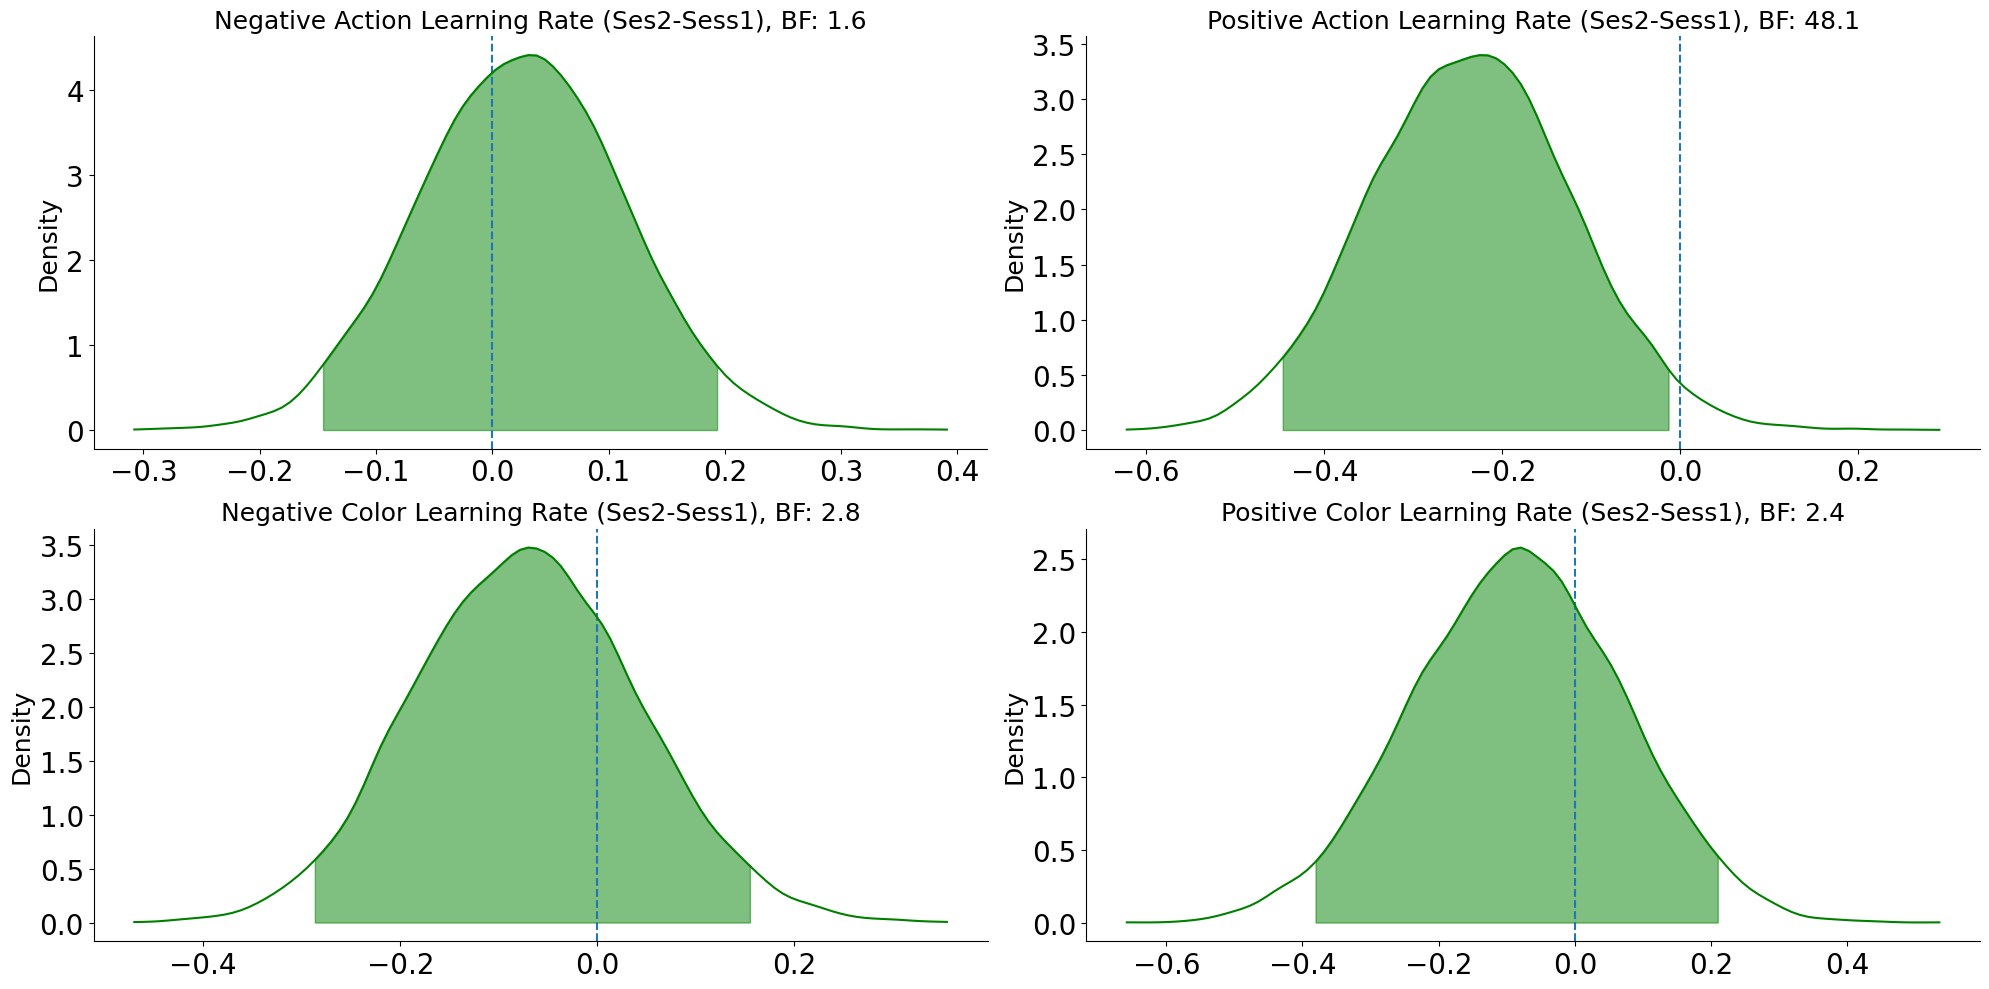

In [13]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=alphaAct_neg[1,0] - alphaAct_neg[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_neg[1,0] - alphaAct_neg[0,0])>0)
bf = i/(1-i)
plt.title(f'Negative Action Learning Rate (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=alphaAct_pos[1,0] - alphaAct_pos[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_pos[0,0] - alphaAct_pos[1,0])>0)
bf = i/(1-i)
plt.title(f'Positive Action Learning Rate (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=alphaClr_neg[1,1] - alphaClr_neg[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_neg[0,1] - alphaClr_neg[1,1])>0)
bf = i/(1-i)
plt.title(f'Negative Color Learning Rate (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=alphaClr_pos[1,1] - alphaClr_pos[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_pos[0,1] - alphaClr_pos[1,1])>0)
bf = i/(1-i)
plt.title(f'Positive Color Learning Rate (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Save figure of parameter distribution 
fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ1.png', dpi=500)


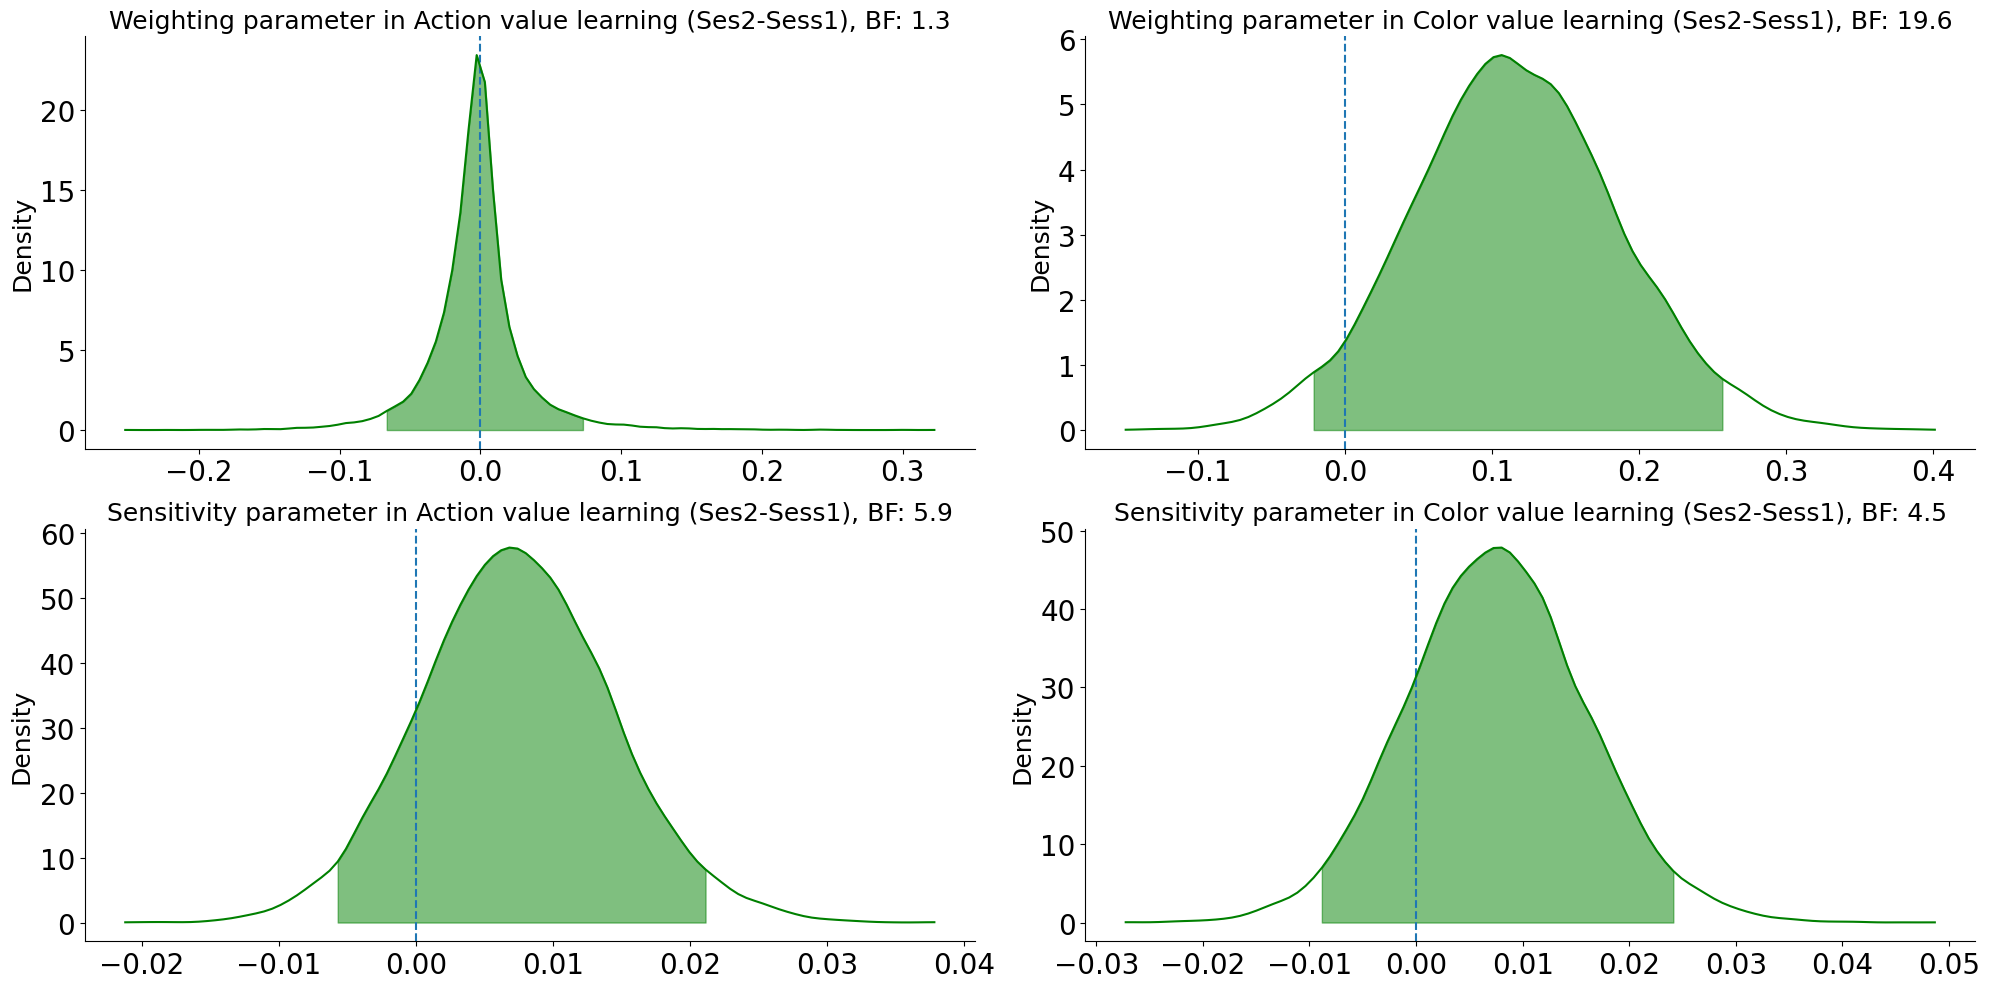

In [14]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Weightign parameter
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight[1,0] - weight[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[1,0] - weight[0,0])>0)
bf = (1-i)/i
plt.title(f'Weighting parameter in Action value learning (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight[1,1] - weight[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[0,1]- weight[1,1])>0)
bf = (1-i)/i
plt.title(f'Weighting parameter in Color value learning (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weightign parameter
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=beta[1,0] - beta[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[0,0] - beta[1,0])>0)
bf = (1-i)/i
plt.title(f'Sensitivity parameter in Action value learning (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=beta[1,1] - beta[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[0,1]- beta[1,1])>0)
bf = (1-i)/i
plt.title(f'Sensitivity parameter in Color value learning (Ses2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ2.png', dpi=500)
